# Exploring the Final Project's Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### EU Dataset

In [2]:
raw_eu = pd.read_csv('data/trains_europe.csv')
eu = raw_eu.drop(0, axis = 0)
unit = raw_eu.iloc[0].to_dict()
for col in eu.columns.drop('country'):
    eu[col] = eu[col].astype(float)
eu

,country,year,total_rail_traffic,perc_passenger_services,passenger_km,population,size,total_rail_traffic_per_size,passenger_km_per_capita
1,Austria,2020.0,162.0,0.70,7.4,8916864.0,82520.00,19.631604,8.298882
2,Belgium,2020.0,93.0,0.87,7.9,11544241.0,30280.00,30.713342,6.843239
3,Bulgaria,2020.0,30.0,0.70,1.1,6934015.0,108560.00,2.763449,1.586382
4,Croatia,2020.0,20.0,0.64,0.4,4047680.0,55960.00,3.573981,0.988220
5,Czech Republic,2020.0,168.0,0.79,6.5,10697858.0,77198.53,21.762072,6.075983
...,...,...,...,...,...,...,...,...,...
146,Slovenia,2016.0,21.0,0.48,0.7,2065042.0,20142.00,10.425976,3.389762
147,Spain,2016.0,192.0,0.87,25.3,46484062.0,499564.00,3.843351,5.442726
148,Sweden,2016.0,158.0,0.77,12.8,9923085.0,407310.64,3.879103,12.899214
149,Switzerland,2016.0,224.0,0.87,20.4,8373338.0,39516.03,56.685856,24.363044


In [3]:
def plot_eu(column, pandemic = False, per_size = False, per_capita = False):
    eu_temp = eu.copy()

    # Per size
    if per_size:
        eu_temp[column] = eu.apply(lambda row: row[column] / row['size'] * 10000, axis = 1)
    
    # Per capita
    if per_capita:
        eu_temp[column] = eu.apply(lambda row: row[column] / row['population'] * 10000, axis = 1)
    
    # Pivot table
    eu_p = eu_temp.pivot(index = 'year', columns = 'country', values = column).reset_index()

    # Zoom on pandemic years
    if pandemic:
        eu_p = eu_p.loc[eu_p['year'] >= 2019]

    # Make plot
    for col in eu_p.drop('year', axis = 1):
        if col == 'Switzerland':
            continue
        plt.plot(
            eu_p['year'],
            eu_p[col],
            marker = '',
            color = 'grey',
            linewidth = 1,
            alpha = 0.5
        )
        plt.text(
            x = 2020.2,
            y = eu_p.iloc[-1][col],
            s = col,
            horizontalalignment='left',
            size='small',
            color='grey'
        )

    # Highlight Switzerland
    plt.plot(
        eu_p['year'],
        eu_p['Switzerland'],
        marker = '',
        color = 'red',
        linewidth = 3,
        alpha = 1
    )
    plt.text(
            x = 2020.2,
            y = eu_p.iloc[-1]['Switzerland'],
            s = 'Switzerland',
            horizontalalignment='left',
            size='large',
            color='red'
        )


    # Formatting
    plt.title(f"{column}{' per 10k km2' if per_size else ''}{' per 10k inhabitants' if per_capita else ''}")
    plt.xlabel('Year')
    plt.ylabel(f"{unit[column]}{' per 10k km2' if per_size else ''}{' per 10k inhabitants' if per_capita else ''}")

    plt.show()

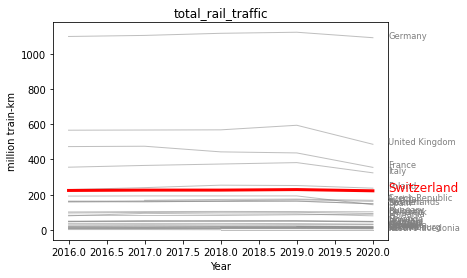

In [4]:
plot_eu('total_rail_traffic', pandemic = False)

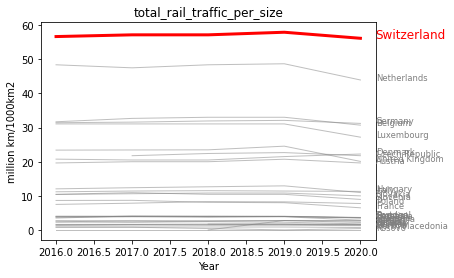

In [5]:
plot_eu('total_rail_traffic_per_size', pandemic = False)

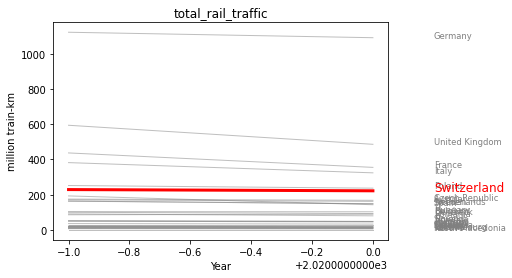

In [6]:
plot_eu('total_rail_traffic', pandemic = True)

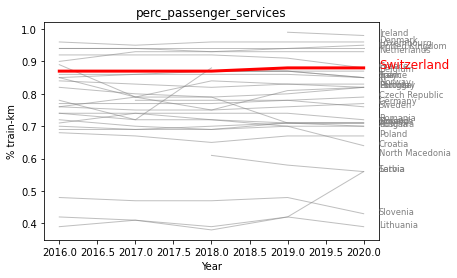

In [7]:
plot_eu('perc_passenger_services', pandemic = False)

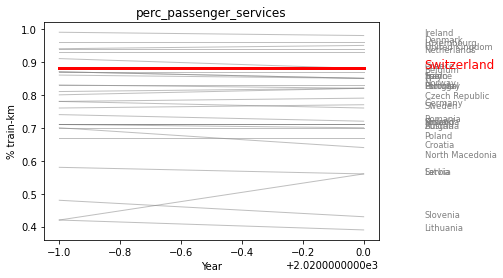

In [8]:
plot_eu('perc_passenger_services', pandemic = True)

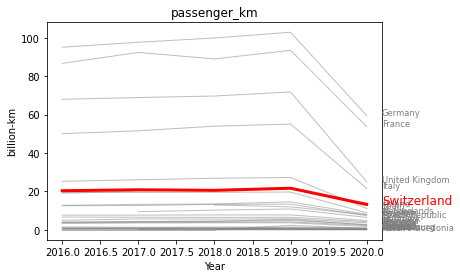

In [9]:
plot_eu('passenger_km', pandemic = False)

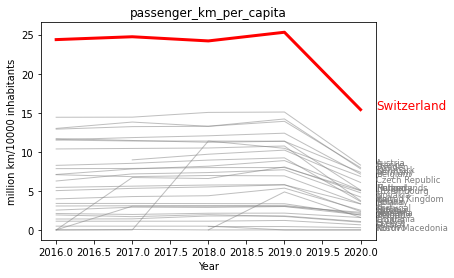

In [10]:
plot_eu('passenger_km_per_capita', pandemic = False)

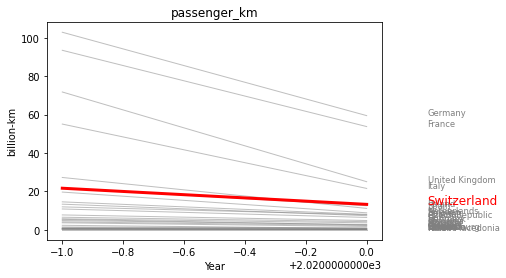

In [11]:
plot_eu('passenger_km', pandemic = True)

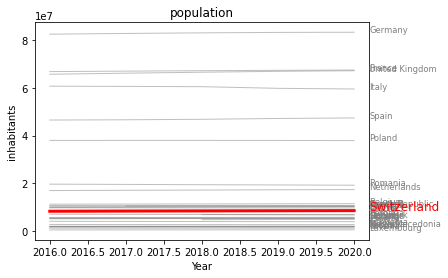

In [12]:
plot_eu('population', pandemic = False)

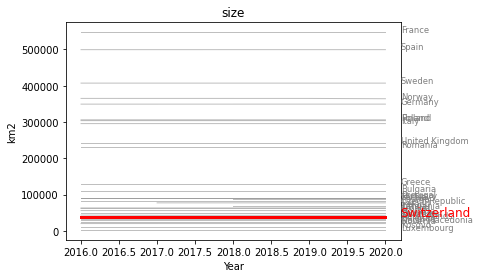

In [13]:
plot_eu('size', pandemic = False)

### Swiss Dataset

In [14]:
raw_ch = pd.read_csv('data/trains_switzerland.csv')
ch = raw_ch.drop(0, axis = 0)
unit = raw_ch.iloc[0].to_dict()
for col in ch.columns:
    ch[col] = ch[col].astype(float)
ch

,year,train_km,train_km_long_distance,passenger_km,passengers_per_day,avg_passengers_per_train,avg_travel_distance_per_passenger,train_km_cargo,energy_consumption_per_passenger,energy_consumption_per_cargo,greenhouse_gas_per_passenger,greenhouse_gas_per_cargo,total_passenger_energy_consumption
1,1903.0,NaN,NaN,1048.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1904.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1905.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1906.0,NaN,NaN,1434.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1907.0,NaN,NaN,1528.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2017.0,150.6,67.6,18501.4,1239427.0,125.4,39.7,36.3,8.5,4.3,14.6,171.7,1572.6190
116,2018.0,147.5,66.2,18608.1,1248908.0,126.9,39.8,36.2,8.4,4.3,15.5,188.2,1563.0804
117,2019.0,151.0,67.3,19689.2,1321790.0,131.0,39.7,35.3,7.9,4.4,14.5,188.0,1555.4468
118,2020.0,146.6,63.8,11705.1,843335.0,80.9,37.2,33.9,12.1,4.0,22.2,189.6,1416.3171


In [15]:
def plot_ch(column, pandemic = False, ch = ch):
    # Zoom on pandemic years
    if pandemic:
        ch = ch.loc[ch['year'] >= 2015]

    # Make plot
    plt.plot(
        ch['year'],
        ch[column],
        marker = '',
        color = 'red',
        linewidth = 3,
        alpha = 1
    )

    # Formatting
    plt.title(f'{column}')
    plt.xlabel('Year')
    plt.ylabel(unit[column])

    plt.show()

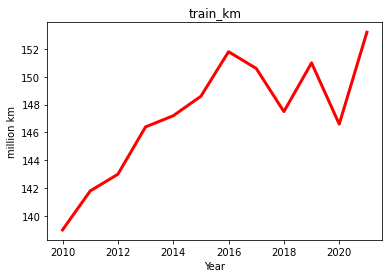

In [16]:
plot_ch('train_km', pandemic = False)

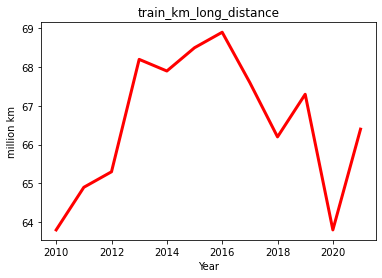

In [17]:
plot_ch('train_km_long_distance', pandemic = False)

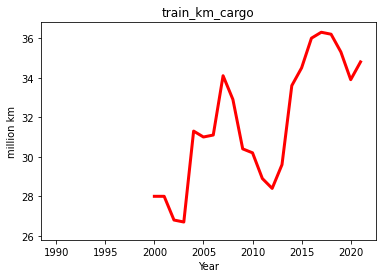

In [18]:
plot_ch('train_km_cargo', pandemic = False)

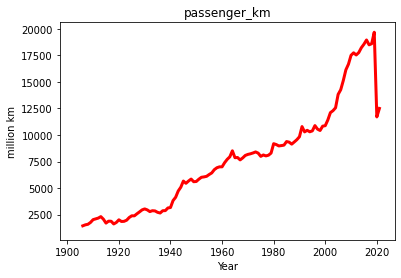

In [19]:
plot_ch('passenger_km', pandemic = False)

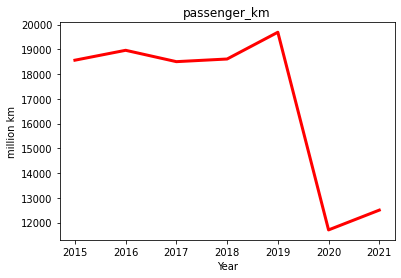

In [20]:
plot_ch('passenger_km', pandemic = True)

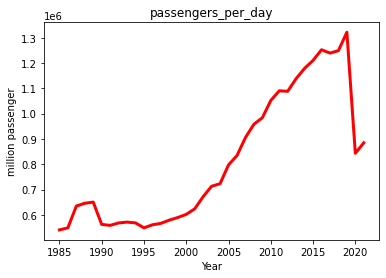

In [21]:
plot_ch('passengers_per_day', pandemic = False)

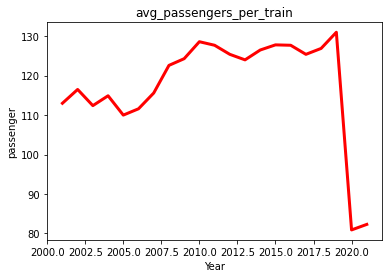

In [22]:
plot_ch('avg_passengers_per_train', pandemic = False)

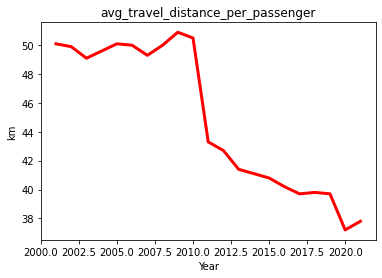

In [23]:
plot_ch('avg_travel_distance_per_passenger', pandemic = False)

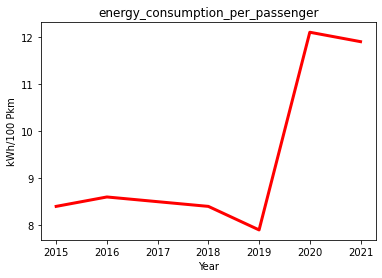

In [24]:
plot_ch('energy_consumption_per_passenger', pandemic = False)

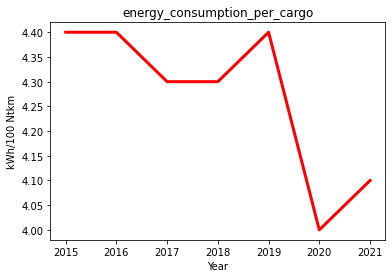

In [25]:
plot_ch('energy_consumption_per_cargo', pandemic = False)

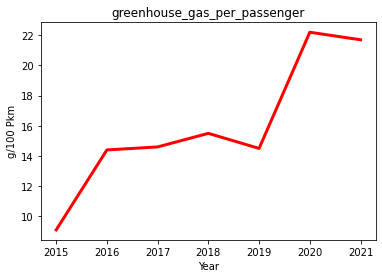

In [26]:
plot_ch('greenhouse_gas_per_passenger', pandemic = False)

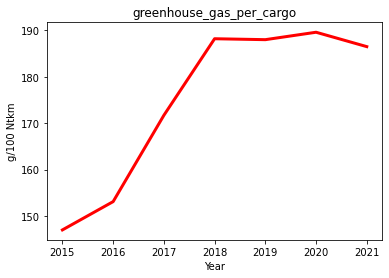

In [27]:
plot_ch('greenhouse_gas_per_cargo', pandemic = False)

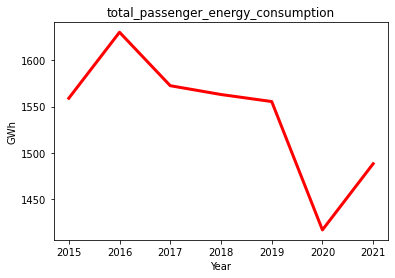

In [28]:
plot_ch('total_passenger_energy_consumption', pandemic = False)

### Europ Infrastructure

In [29]:
raw_inf = pd.read_csv('data/infrastructure_europe.csv')
inf = raw_inf.drop(0, axis = 0)
unit = raw_inf.iloc[0].to_dict()
for col in inf.columns.drop(['country']):
    inf[col] = inf[col].astype(float)
inf

,country,route_km,size,route_km_per_size
1,Albania,NaN,27400.000,NaN
2,Andorra,NaN,470.000,NaN
3,Austria,4877.00000,82520.000,59.100824
4,Belarus,5459.00000,202980.000,26.894275
5,Belgium,3607.00000,30280.000,119.121532
6,Bosnia and Herzegovina,1018.05400,51200.000,19.883867
7,Bulgaria,4030.00000,108560.000,37.122329
8,Croatia,2617.00000,55960.000,46.765547
9,Czech Republic,9396.00000,77198.530,121.712162
10,Denmark,NaN,40000.000,NaN


In [30]:
def plot_inf(column):
    inf_temp = inf[['country', column]].sort_values(column, ascending = False)

    # Make plot
    plt.bar(
        inf_temp['country'],
        inf_temp[column]
    )

    # Formatting
    plt.title(f"{column}")
    plt.ylabel(f"{unit[column]}")
    plt.xticks(rotation = 90)
    plt.show()

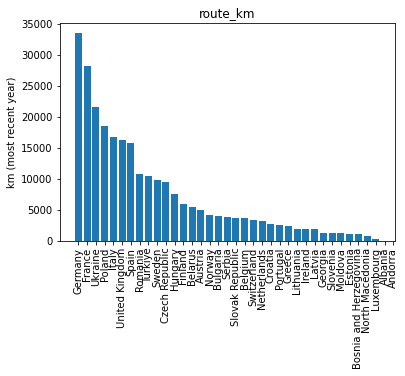

In [31]:
plot_inf('route_km')

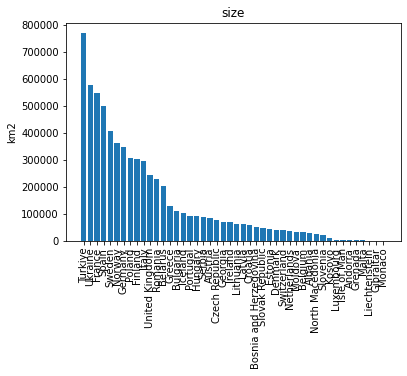

In [32]:
plot_inf('size')

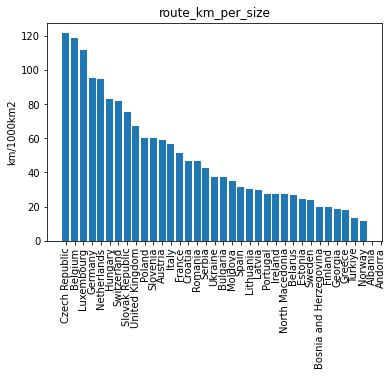

In [33]:
plot_inf('route_km_per_size')